In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point, LineString, Polygon
from dateutil.parser import parse
import requests 
import json
from io import StringIO
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# these are all things that might be currently needed 

In [ ]:
#use your own token
headers={'X-App-Token':'BLANK'}
##https://dev.socrata.com/foundry/data.sfgov.org/wr8u-xric go here to create a token 

url='https://data.sfgov.org/api/v3/views/wr8u-xric/query.json?query=SELECT%0A%20%20%60incident_number%60%2C%0A%20%20%60exposure_number%60%2C%0A%20%20%60id%60%2C%0A%20%20%60address%60%2C%0A%20%20%60incident_date%60%2C%0A%20%20%60call_number%60%2C%0A%20%20%60alarm_dttm%60%2C%0A%20%20%60arrival_dttm%60%2C%0A%20%20%60close_dttm%60%2C%0A%20%20%60city%60%2C%0A%20%20%60zipcode%60%2C%0A%20%20%60battalion%60%2C%0A%20%20%60station_area%60%2C%0A%20%20%60box%60%2C%0A%20%20%60suppression_units%60%2C%0A%20%20%60suppression_personnel%60%2C%0A%20%20%60ems_units%60%2C%0A%20%20%60ems_personnel%60%2C%0A%20%20%60other_units%60%2C%0A%20%20%60other_personnel%60%2C%0A%20%20%60first_unit_on_scene%60%2C%0A%20%20%60estimated_property_loss%60%2C%0A%20%20%60estimated_contents_loss%60%2C%0A%20%20%60fire_fatalities%60%2C%0A%20%20%60fire_injuries%60%2C%0A%20%20%60civilian_fatalities%60%2C%0A%20%20%60civilian_injuries%60%2C%0A%20%20%60number_of_alarms%60%2C%0A%20%20%60primary_situation%60%2C%0A%20%20%60mutual_aid%60%2C%0A%20%20%60action_taken_primary%60%2C%0A%20%20%60action_taken_secondary%60%2C%0A%20%20%60action_taken_other%60%2C%0A%20%20%60detector_alerted_occupants%60%2C%0A%20%20%60property_use%60%2C%0A%20%20%60area_of_fire_origin%60%2C%0A%20%20%60ignition_cause%60%2C%0A%20%20%60ignition_factor_primary%60%2C%0A%20%20%60ignition_factor_secondary%60%2C%0A%20%20%60heat_source%60%2C%0A%20%20%60item_first_ignited%60%2C%0A%20%20%60human_factors_associated_with_ignition%60%2C%0A%20%20%60structure_type%60%2C%0A%20%20%60structure_status%60%2C%0A%20%20%60floor_of_fire_origin%60%2C%0A%20%20%60fire_spread%60%2C%0A%20%20%60no_flame_spread%60%2C%0A%20%20%60number_of_floors_with_minimum_damage%60%2C%0A%20%20%60number_of_floors_with_significant_damage%60%2C%0A%20%20%60number_of_floors_with_heavy_damage%60%2C%0A%20%20%60number_of_floors_with_extreme_damage%60%2C%0A%20%20%60detectors_present%60%2C%0A%20%20%60detector_type%60%2C%0A%20%20%60detector_operation%60%2C%0A%20%20%60detector_effectiveness%60%2C%0A%20%20%60detector_failure_reason%60%2C%0A%20%20%60automatic_extinguishing_system_present%60%2C%0A%20%20%60automatic_extinguishing_sytem_type%60%2C%0A%20%20%60automatic_extinguishing_sytem_perfomance%60%2C%0A%20%20%60automatic_extinguishing_sytem_failure_reason%60%2C%0A%20%20%60number_of_sprinkler_heads_operating%60%2C%0A%20%20%60supervisor_district%60%2C%0A%20%20%60neighborhood_district%60%2C%0A%20%20%60point%60%2C%0A%20%20%60data_as_of%60%2C%0A%20%20%60data_loaded_at%60'
r=requests.get(url,headers=headers)
# this needs to be updated to use api 
# r1=requests.get('https://data.sfgov.org/resource/wr8u-xric.geojson')

In [3]:
df_base=pd.read_json(StringIO(json.dumps(r.json())))
# this a table of raw data 

In [4]:
df_base['incident_year']=df_base['incident_date'].apply(lambda x:parse(x).year)
# this creates a year column 
df_base['incident_month']=df_base['incident_date'].apply(lambda x:parse(x).month)
# this creates a month column 

In [5]:
base_date=df_base.groupby(['neighborhood_district','primary_situation'],as_index=False)['incident_date'].nunique()
# this is the amount of unique incident_dates for each neighborhood and primary_situation
base_amount=df_base.groupby(['neighborhood_district','primary_situation'],as_index=False)['incident_number'].nunique()
# this is the amount of unique incident_numbers for each neighborhood and primary_situation


In [6]:
base_date.columns=['neighborhood_district','primary_situation','date_amount']
base_amount.columns=['neighborhood_district','primary_situation','incident_amount']
base_amount=base_amount.sort_values(by='incident_amount',ascending=False)
base_date=base_date.sort_values(by='date_amount',ascending=False)
base_amount=base_amount.reset_index(drop=True)
base_date=base_date.reset_index(drop=True)
# this creates two seperate tables 
# base_date and base_amount 


In [7]:
base_amount=base_amount.reset_index(drop=True)
base_date=base_date.reset_index(drop=True)

In [8]:
base_amount

,neighborhood_district,primary_situation,incident_amount
0,Mission,"711 - Municipal alarm system, Street Box False",7149
1,South of Market,"711 - Municipal alarm system, Street Box False",6759
2,Tenderloin,"711 - Municipal alarm system, Street Box False",6672
3,Financial District/South Beach,"700 False alarm or false call, other",4535
4,Tenderloin,"700 False alarm or false call, other",4174
...,...,...,...
10112,Japantown,"540 - Animal problem, other",1
10113,Japantown,561 Unauthorized burning,1
10114,Western Addition,"672 Biological hazard investigation, none found",1
10115,Bayview Hunters Point,136 - Self-propelled motor home or RV,1


In [9]:
# base_amount[base_amount['primary_situation']=='700 - False alarm or false call, other'].sort_values(by='incident_number',ascending=False)

In [10]:
base_amount

,neighborhood_district,primary_situation,incident_amount
0,Mission,"711 - Municipal alarm system, Street Box False",7149
1,South of Market,"711 - Municipal alarm system, Street Box False",6759
2,Tenderloin,"711 - Municipal alarm system, Street Box False",6672
3,Financial District/South Beach,"700 False alarm or false call, other",4535
4,Tenderloin,"700 False alarm or false call, other",4174
...,...,...,...
10112,Japantown,"540 - Animal problem, other",1
10113,Japantown,561 Unauthorized burning,1
10114,Western Addition,"672 Biological hazard investigation, none found",1
10115,Bayview Hunters Point,136 - Self-propelled motor home or RV,1


It looks like False calls might happen alot 
for  the situations with over 1000 incidents 
how many are from one address  in one neighborhood year over year 

In [11]:
base_amount[base_amount['incident_amount']>1000]

,neighborhood_district,primary_situation,incident_amount
0,Mission,"711 - Municipal alarm system, Street Box False",7149
1,South of Market,"711 - Municipal alarm system, Street Box False",6759
2,Tenderloin,"711 - Municipal alarm system, Street Box False",6672
3,Financial District/South Beach,"700 False alarm or false call, other",4535
4,Tenderloin,"700 False alarm or false call, other",4174
...,...,...,...
87,Sunset/Parkside,"440 Electrical wiring/equipment problem, other",1018
88,Mission,322 - Vehicle accident with injuries,1016
89,Mission,"311 Medical assist, assist EMS crew",1015
90,Inner Richmond,"700 False alarm or false call, other",1012


In [11]:
# we will use this to filter the data 
filter_table=base_date[base_date['date_amount']>1000]

In [12]:
filter_table

,neighborhood_district,primary_situation,date_amount
0,Mission,"711 - Municipal alarm system, Street Box False",3050
1,South of Market,"711 - Municipal alarm system, Street Box False",2852
2,Tenderloin,"711 - Municipal alarm system, Street Box False",2842
3,Financial District/South Beach,"700 False alarm or false call, other",2453
4,Tenderloin,"700 False alarm or false call, other",2369
...,...,...,...
57,Tenderloin,733 - Smoke detector activation/malfunction,1016
58,Castro/Upper Market,"711 - Municipal alarm system, Street Box False",1015
59,South of Market,"700 - False alarm or false call, other",1008
60,Hayes Valley,"711 - Municipal alarm system, Street Box False",1007


In [13]:
df_base

,incident_number,exposure_number,id,address,incident_date,call_number,alarm_dttm,arrival_dttm,close_dttm,city,...,detector_failure_reason,ignition_factor_secondary,fire_spread,number_of_floors_with_minimum_damage,number_of_floors_with_significant_damage,number_of_floors_with_heavy_damage,number_of_floors_with_extreme_damage,first_unit_on_scene,incident_year,incident_month
0,22095203,0,220952030,57 TAYLOR STREET,2022-07-26T00:00:00.000,222071072,2022-07-26T10:52:11.000,2022-07-26T10:52:30.000,2022-07-26T11:08:18.000,San Francisco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,7
1,22095204,0,220952040,3628 16TH STREET,2022-07-26T00:00:00.000,222071073,2022-07-26T10:52:34.000,2022-07-26T10:58:24.000,2022-07-26T11:10:53.000,San Francisco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,7
2,22095225,0,220952250,600 OAK STREET,2022-07-26T00:00:00.000,222071222,2022-07-26T11:36:57.000,2022-07-26T11:40:06.000,2022-07-26T11:42:54.000,San Francisco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,7
3,22095231,0,220952310,5TH STREET,2022-07-26T00:00:00.000,222071267,2022-07-26T11:47:09.000,2022-07-26T11:50:18.000,2022-07-26T12:05:09.000,San Francisco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,7
4,22095235,0,220952350,1080 CHURCH STREET,2022-07-26T00:00:00.000,222071299,2022-07-26T11:57:50.000,2022-07-26T12:02:05.000,2022-07-26T12:23:04.000,San Francisco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721295,8010528,0,80105280,400 Valencia St.,2008-02-02T00:00:00.000,80330277,2008-02-02T18:46:20.000,2008-02-02T18:51:21.000,2008-02-02T19:08:28.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RS2,2008,2
721296,8010530,0,80105300,19th Av. / Taraval St.,2008-02-02T00:00:00.000,80330279,2008-02-02T18:56:25.000,2008-02-02T19:01:00.000,2008-02-02T19:44:36.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E40,2008,2
721297,8010534,0,80105340,Monterey Bl. / El Verano Wy.,2008-02-02T00:00:00.000,80330283,2008-02-02T19:11:14.000,2008-02-02T19:15:24.000,2008-02-02T19:19:08.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E15,2008,2
721298,8010547,0,80105470,700 Monterey Bl.,2008-02-02T00:00:00.000,80330298,2008-02-02T19:59:04.000,2008-02-02T20:03:16.000,2008-02-02T20:23:46.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E15,2008,2


In [14]:
filtered_base=df_base[(df_base['primary_situation'].isin(pd.Series(filter_table['primary_situation'].unique()))) & (df_base['neighborhood_district'].isin(pd.Series(filter_table['neighborhood_district'].unique())))]

In [15]:
new_base=filtered_base[['incident_number','id','incident_date','primary_situation','neighborhood_district','incident_year','incident_month','point']]

# amount table by year  will be what we will use for forecasting 


In [16]:
# this gets the amount of incident_numbers for neighborhood_district by incident_year primary_situation
amount_table_by_year=new_base.groupby(['neighborhood_district','incident_year','primary_situation'],as_index=False)['incident_number'].nunique()
# this gets the amount of incident_numbers for neighborhood_district by incident_year incident_month primary_situation 
amount_table_by_year_month=new_base.groupby(['neighborhood_district','incident_year','incident_month','primary_situation'],as_index=False)['incident_number'].nunique()

In [17]:
amount_table_by_year_month['date_key']=amount_table_by_year_month.apply(lambda x:(str(x['incident_year'])+"-"+str(x['incident_month'])),axis=1)

In [20]:
# amount_table=amount_table.sort_values(by=['neighborhood_district','primary_situation'])

In [21]:
amount_table_by_year_month

,neighborhood_district,incident_year,incident_month,primary_situation,incident_number,date_key
0,Bayview Hunters Point,2003,1,"113 - Cooking fire, confined to container",1,2003-1
1,Bayview Hunters Point,2003,1,"700 - False alarm or false call, other",5,2003-1
2,Bayview Hunters Point,2003,1,"711 - Municipal alarm system, Street Box False",65,2003-1
3,Bayview Hunters Point,2003,1,735 - Alarm system sounded due to malfunction,6,2003-1
4,Bayview Hunters Point,2003,1,"740 - Unintentional alarm, other",2,2003-1
...,...,...,...,...,...,...
32298,Western Addition,2025,10,554 Assist invalid,3,2025-10
32299,Western Addition,2025,10,"700 False alarm or false call, other",3,2025-10
32300,Western Addition,2025,10,735 Alarm system sounded due to malfunction,1,2025-10
32301,Western Addition,2025,10,"743 Smoke detector activation, no fire - unint...",4,2025-10


In [18]:
amount_table_by_year['primary_situation_code']=amount_table_by_year['primary_situation'].apply(lambda x: x[0:3])
amount_table_by_year_month['primary_situation_code']=amount_table_by_year_month['primary_situation'].apply(lambda x: x[0:3])

In [19]:
amount_table_by_year['rolling_number']=amount_table_by_year['incident_number'].rolling(window=1).sum()
amount_table_by_year_month['rolling_number']=amount_table_by_year_month['incident_number'].rolling(window=1).sum()
amount_table_by_year_month['rolling_mean']=amount_table_by_year_month['incident_number'].rolling(window=1).mean()
amount_table_by_year['rolling_mean']=amount_table_by_year['incident_number'].rolling(window=1).mean()

<Axes: xlabel='date_key', ylabel='incident_number'>

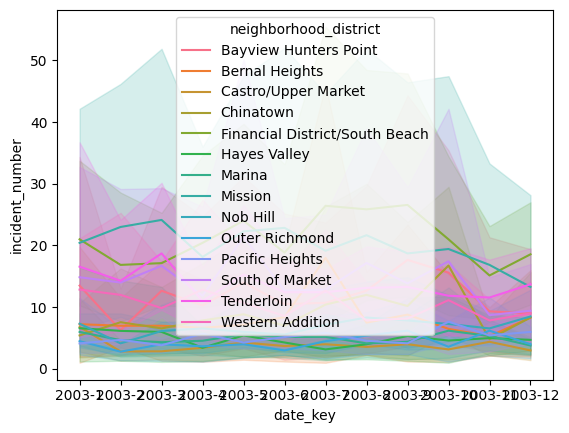

In [24]:

sns.lineplot(data=amount_table_by_year_month[amount_table_by_year_month['incident_year']==2003],x='date_key',y='incident_number',hue='neighborhood_district')

<Axes: xlabel='date_key', ylabel='rolling_number'>

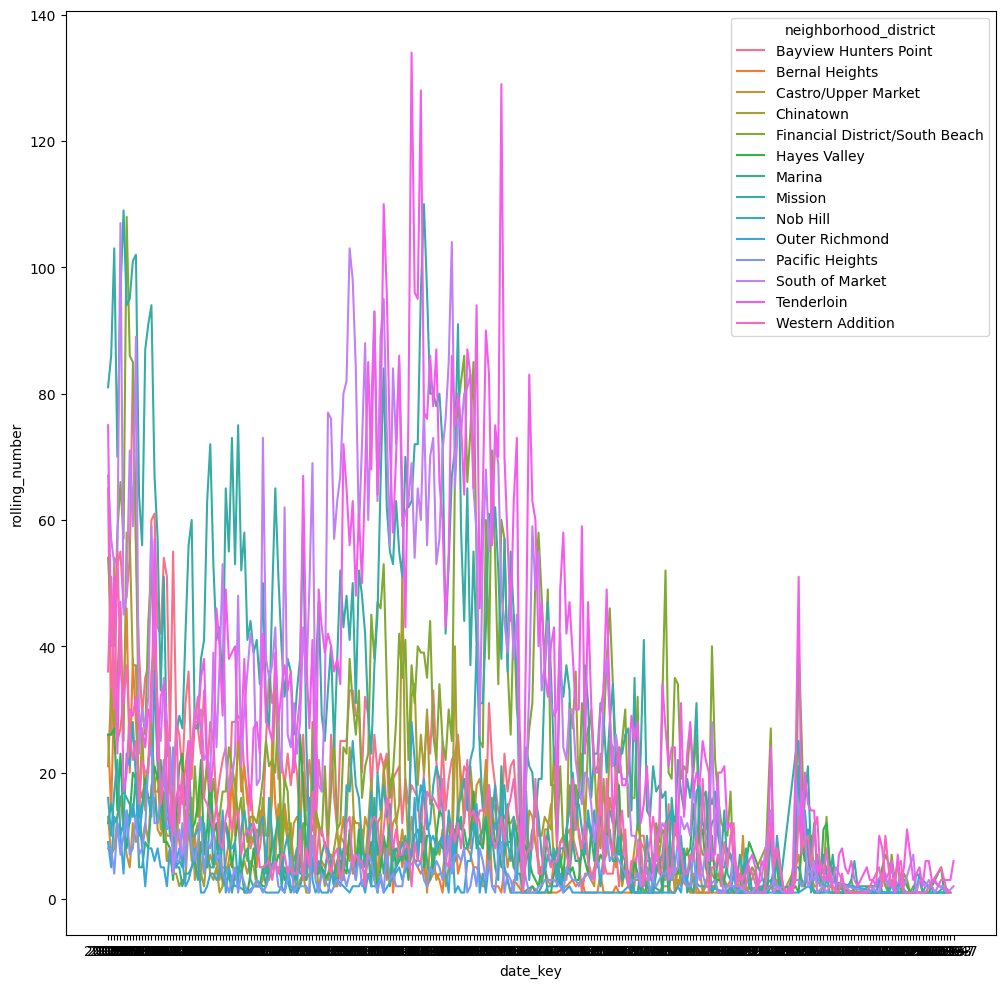

In [25]:
plt.figure(figsize=(12, 12))
sns.lineplot(data=amount_table_by_year_month[amount_table_by_year_month['primary_situation'].str.contains('711')],x='date_key',y='rolling_number',hue='neighborhood_district')

In [20]:
amount_table_by_year.groupby(['neighborhood_district','incident_year','primary_situation','primary_situation_code'],as_index=False)['incident_number'].nunique()

,neighborhood_district,incident_year,primary_situation,primary_situation_code,incident_number
0,Bayview Hunters Point,2003,"113 - Cooking fire, confined to container",113,1
1,Bayview Hunters Point,2003,"700 - False alarm or false call, other",700,1
2,Bayview Hunters Point,2003,"711 - Municipal alarm system, Street Box False",711,1
3,Bayview Hunters Point,2003,733 - Smoke detector activation/malfunction,733,1
4,Bayview Hunters Point,2003,735 - Alarm system sounded due to malfunction,735,1
...,...,...,...,...,...
3182,Western Addition,2025,"700 False alarm or false call, other",700,1
3183,Western Addition,2025,"711 Municipal alarm system, malicious false alarm",711,1
3184,Western Addition,2025,735 Alarm system sounded due to malfunction,735,1
3185,Western Addition,2025,"743 Smoke detector activation, no fire - unint...",743,1


In [20]:
amount_table_by_year

,neighborhood_district,incident_year,primary_situation,incident_number
0,Bayview Hunters Point,2003,"113 - Cooking fire, confined to container",36
1,Bayview Hunters Point,2003,"700 - False alarm or false call, other",97
2,Bayview Hunters Point,2003,"711 - Municipal alarm system, Street Box False",608
3,Bayview Hunters Point,2003,733 - Smoke detector activation/malfunction,3
4,Bayview Hunters Point,2003,735 - Alarm system sounded due to malfunction,54
...,...,...,...,...
3182,Western Addition,2025,"700 False alarm or false call, other",105
3183,Western Addition,2025,"711 Municipal alarm system, malicious false alarm",3
3184,Western Addition,2025,735 Alarm system sounded due to malfunction,94
3185,Western Addition,2025,"743 Smoke detector activation, no fire - unint...",78


In [22]:
fig = px.line(amount_table_by_year[amount_table_by_year['primary_situation_code']=='700'], x="incident_year", y="rolling_number", color='neighborhood_district')
fig.show()

In [21]:
import plotly.express as px

fig = px.scatter(amount_table_by_year,
                 x="incident_year",
                  y="rolling_number", 
                  color="primary_situation_code",
                 size='rolling_number', hover_data=['neighborhood_district'])
fig.show()

In [23]:
# this table is all situations that are 700 False alarm or false call, other	for Western Addition
forecast_base=amount_table_by_year[(amount_table_by_year['primary_situation_code']=='700') & (amount_table_by_year['neighborhood_district']=='Western Addition')]

In [24]:
forecast_base

,neighborhood_district,incident_year,primary_situation,incident_number,primary_situation_code,rolling_number,rolling_mean
2960,Western Addition,2003,"700 - False alarm or false call, other",94,700,94.0,94.0
2967,Western Addition,2004,"700 - False alarm or false call, other",126,700,126.0,126.0
2974,Western Addition,2005,"700 - False alarm or false call, other",113,700,113.0,113.0
2981,Western Addition,2006,"700 - False alarm or false call, other",85,700,85.0,85.0
2988,Western Addition,2007,"700 - False alarm or false call, other",52,700,52.0,52.0
2995,Western Addition,2008,"700 - False alarm or false call, other",78,700,78.0,78.0
3002,Western Addition,2009,"700 - False alarm or false call, other",66,700,66.0,66.0
3009,Western Addition,2010,"700 - False alarm or false call, other",40,700,40.0,40.0
3016,Western Addition,2011,"700 - False alarm or false call, other",68,700,68.0,68.0
3023,Western Addition,2012,"700 - False alarm or false call, other",63,700,63.0,63.0


In [28]:
forecast_base

,neighborhood_district,incident_year,primary_situation,incident_number,primary_situation_code,rolling_number,rolling_mean
2960,Western Addition,2003,"700 - False alarm or false call, other",94,700,94.0,94.0
2967,Western Addition,2004,"700 - False alarm or false call, other",126,700,126.0,126.0
2974,Western Addition,2005,"700 - False alarm or false call, other",113,700,113.0,113.0
2981,Western Addition,2006,"700 - False alarm or false call, other",85,700,85.0,85.0
2988,Western Addition,2007,"700 - False alarm or false call, other",52,700,52.0,52.0
2995,Western Addition,2008,"700 - False alarm or false call, other",78,700,78.0,78.0
3002,Western Addition,2009,"700 - False alarm or false call, other",66,700,66.0,66.0
3009,Western Addition,2010,"700 - False alarm or false call, other",40,700,40.0,40.0
3016,Western Addition,2011,"700 - False alarm or false call, other",68,700,68.0,68.0
3023,Western Addition,2012,"700 - False alarm or false call, other",63,700,63.0,63.0


In [33]:
forecast_base=forecast_base.reset_index(drop=True)

In [30]:
len(np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0]))

12

array([ 94., 126., 113.,  85.,  52.,  78.,  66.,  40.,  68.,  63.,  82.,
        17.])

In [ ]:
forecast_base['rolling_number'].to_numpy().reshape(12,2)

array([[ 94., 126.],
       [113.,  85.],
       [ 52.,  78.],
       [ 66.,  40.],
       [ 68.,  63.],
       [ 82.,  17.],
       [143., 142.],
       [140., 141.],
       [146., 200.],
       [161., 104.],
       [114., 125.],
       [107., 105.]])

In [ ]:
np.arange(list(forecast_base['rolling_number'])).reshape(23,2)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [57]:
pre=forecast_base['rolling_number'].to_numpy()

In [70]:
X, y =pre.reshape((24,2)),range(24)

ValueError: cannot reshape array of size 24 into shape (24,2)

In [44]:
forecast_base

,neighborhood_district,incident_year,primary_situation,incident_number,primary_situation_code,rolling_number,rolling_mean
2960,Western Addition,2003,"700 - False alarm or false call, other",94,700,94.0,94.0
2967,Western Addition,2004,"700 - False alarm or false call, other",126,700,126.0,126.0
2974,Western Addition,2005,"700 - False alarm or false call, other",113,700,113.0,113.0
2981,Western Addition,2006,"700 - False alarm or false call, other",85,700,85.0,85.0
2988,Western Addition,2007,"700 - False alarm or false call, other",52,700,52.0,52.0
2995,Western Addition,2008,"700 - False alarm or false call, other",78,700,78.0,78.0
3002,Western Addition,2009,"700 - False alarm or false call, other",66,700,66.0,66.0
3009,Western Addition,2010,"700 - False alarm or false call, other",40,700,40.0,40.0
3016,Western Addition,2011,"700 - False alarm or false call, other",68,700,68.0,68.0
3023,Western Addition,2012,"700 - False alarm or false call, other",63,700,63.0,63.0


In [36]:

model=LinearRegression()
X=forecast_base['rolling_number'].to_numpy().reshape(12,2)
y=forecast_base['rolling_mean'].to_numpy()[0:12]
X_train, X_test, y_train, y_test = train_test_split(X, y)
reg=model.fit(X_train,y_train)

In [37]:
reg.score(X,y)

0.010151608312146787

In [48]:
np.array([[2,3,4]])

array([[2, 3, 4]])

In [50]:
X_test

array([[114., 125.],
       [ 52.,  78.],
       [161., 104.]])

In [51]:
reg.predict( X_test)

array([66.81460954, 70.38605396, 71.69951092])